# Homework Assignment 4
### The Art of Analyzing Big Data - The Data Scientist’s Toolbox

## Reddit Networks
Using the [Movie Dynamics Networks dataset](https://www.kaggle.com/datasets/michaelfire/movie-dynamics-over-15000-movie-social-networks) select the subreddit of your favorite  movie show. Using the data of the selected movie,
answer the following questions:

**Task 1:** Calculate and visualize the degree distribution  of the vertices  in the network (15pt)


Movie: Die Nibelungen: Kriemhild's Revenge (1924_Die_Nibelungen_Kriemhild_s_Revenge.json)


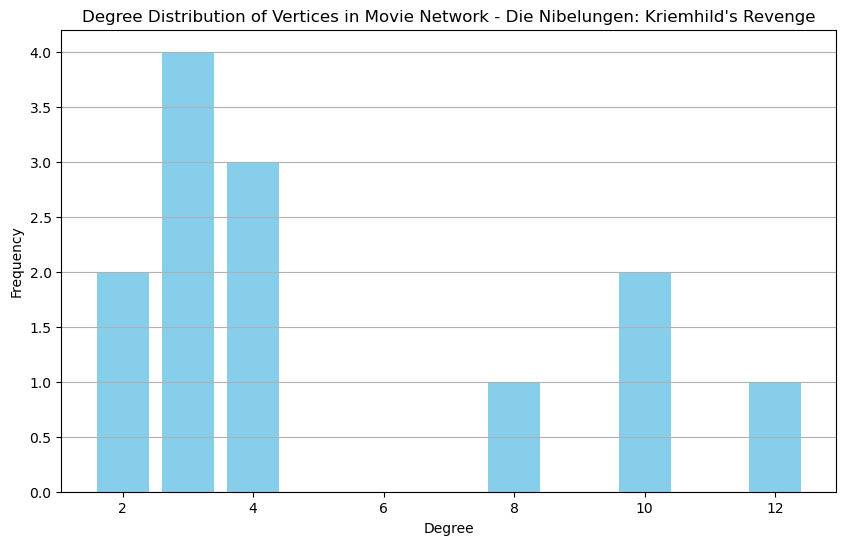

In [1]:
# Import necessary libraries
import json
import os
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Set the path to the dataset folder
dataset_folder = "moviedynamics"

# Function to read and parse a movie file
def read_movie_file(file_path):
    with open(file_path, "r") as file:
        data = json.load(file)
    return data

# Function to create a graph from movie data
def create_movie_graph(movie_data):
    G = nx.Graph()
    
    # Add nodes with roles as attributes
    for node_info in movie_data['nodes']:
        G.add_node(node_info['id'], role=node_info['role'])
    
    # Add edges with weights
    for link_info in movie_data['links']:
        G.add_edge(link_info['source'], link_info['target'], weight=link_info['weight'])
    
    return G

# Function to calculate and visualize degree distribution
def calculate_and_visualize_degree_distribution(movie_data, filename):
    # Create a graph for the movie
    movie_graph = create_movie_graph(movie_data)
    
    # Calculate degree distribution
    degrees = dict(movie_graph.degree())
    degree_values = list(degrees.values())
    
    unique_degrees = np.unique(degree_values)
    degree_distribution = [list(degree_values).count(degree) for degree in unique_degrees]
    
    # Get movie name
    movie_name = movie_data['graph']['movie_name']
    
    # Print filename
    print(f"\nMovie: {movie_name} ({filename})")
    
    # Visualize degree distribution
    plt.figure(figsize=(10, 6))
    plt.bar(unique_degrees, degree_distribution, color='skyblue')
    plt.title(f'Degree Distribution of Vertices in Movie Network - {movie_name}')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()

# Specify the movie file name
target_movie_filename = "1924_Die_Nibelungen_Kriemhild_s_Revenge.json"

# Load the target movie from the dataset
target_movie_path = os.path.join(dataset_folder, target_movie_filename)
target_movie_data = read_movie_file(target_movie_path)

# Calculate and visualize degree distribution for the target movie
calculate_and_visualize_degree_distribution(target_movie_data, target_movie_filename)

**Task 2:** Create a subgraph of the top-12 movie characters according to a selected centrality algorithm. Draw the subgraph using circlular layout (15pt)

The most central hero according to Closeness Centrality is: Rüdiger von Bechlarn


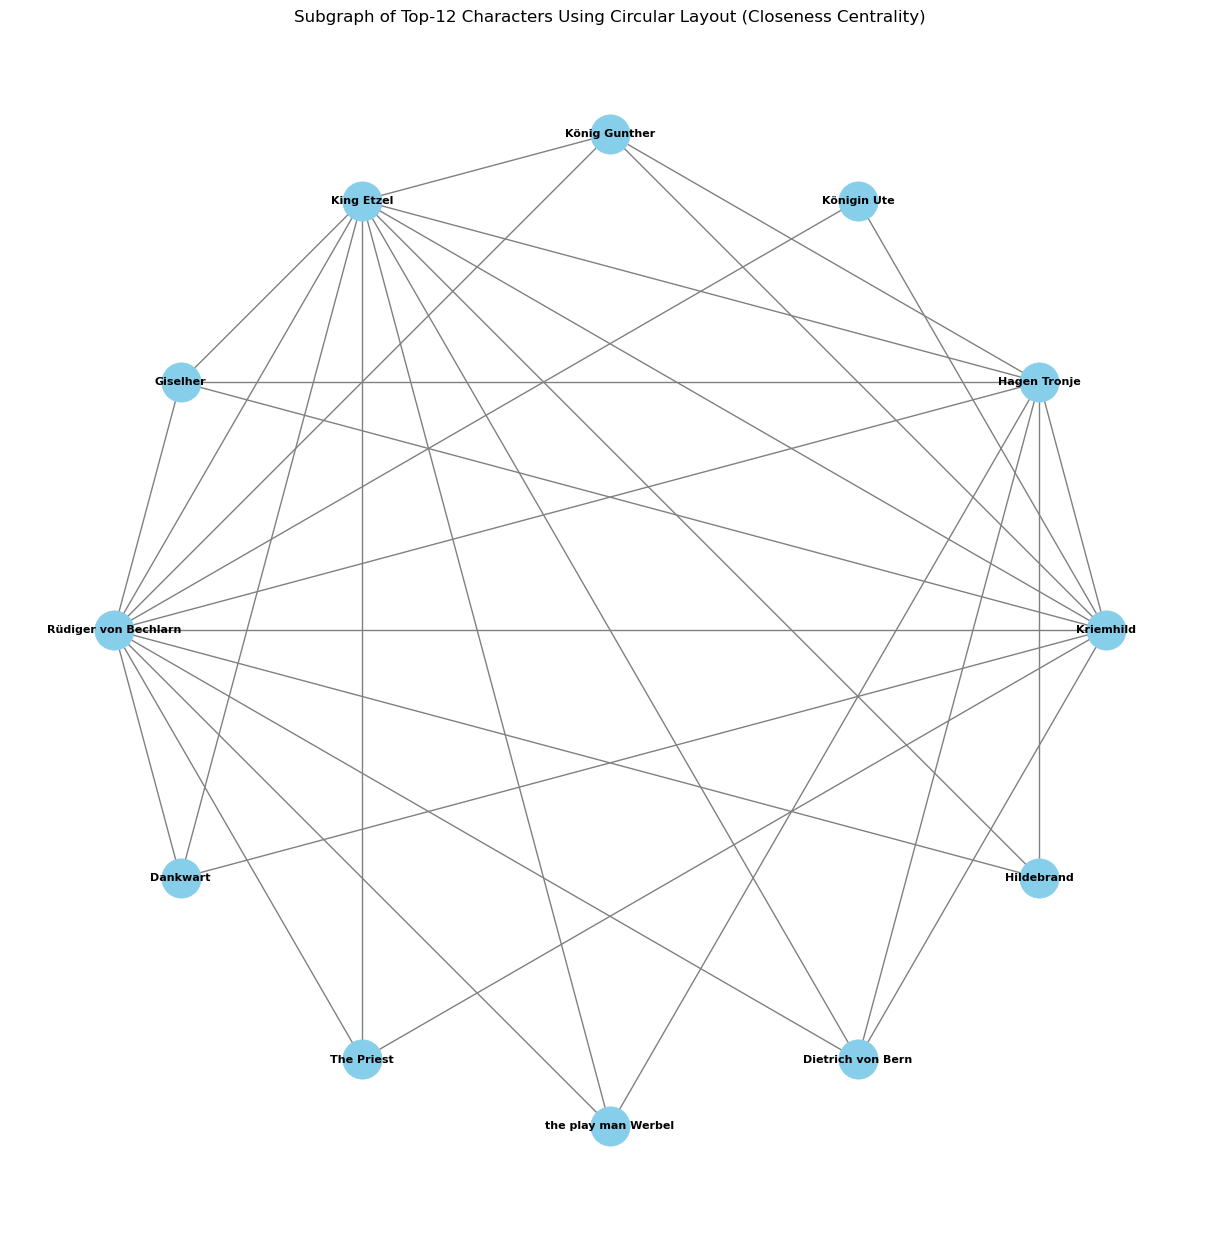

In [2]:
import operator

# Create a graph for the target movie
movie_graph = create_movie_graph(target_movie_data)

# Calculate Closeness Centrality for each node
closeness_centrality = nx.closeness_centrality(movie_graph)

# Identify the most central hero based on Closeness Centrality
most_central_hero = max(closeness_centrality.items(), key=operator.itemgetter(1))[0]

# Print the most central hero
print(f"The most central hero according to Closeness Centrality is: {most_central_hero}")

# Identify the top-12 characters based on Closeness Centrality
top_characters = sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)[:12]

# Create a subgraph with the top-12 characters
subgraph = movie_graph.subgraph(top_characters)

# Visualize the subgraph using circular layout
plt.figure(figsize=(12, 12))
pos = nx.circular_layout(subgraph)
nx.draw(subgraph, pos, with_labels=True, font_size=8, font_color='black', node_size=800, node_color='skyblue', font_weight='bold', edge_color='gray', linewidths=0.5)
plt.title('Subgraph of Top-12 Characters Using Circular Layout (Closeness Centrality)')
plt.show()

**Task 3:** Calculate the PageRank, triangles, and average shortest path of each vertex in the graph (15pt)

In [3]:
# Calculate PageRank for each node
pagerank = nx.pagerank(movie_graph)

# Identify the most central hero based on PageRank
most_central_hero_pagerank = max(pagerank.items(), key=operator.itemgetter(1))[0]

# Print the most central hero according to PageRank
print(f"The most central hero according to PageRank is: {most_central_hero_pagerank}")

# Calculate triangles count for each node
triangles = nx.triangles(movie_graph)

# Print triangles count for each node
print("\nTriangles count for each character:")
for node, triangle_count in triangles.items():
    print(f"{node}: {triangle_count}")

# Calculate average shortest path for each node
average_shortest_path = nx.shortest_path_length(movie_graph)

# Print average shortest path for each node
print("\nAverage Shortest Path for each character:")
for node, shortest_path_dict in average_shortest_path:
    avg_shortest_path = sum(shortest_path_dict.values()) / len(shortest_path_dict)
    print(f"{node}: {avg_shortest_path}")

The most central hero according to PageRank is: Rüdiger von Bechlarn

Triangles count for each character:
Kriemhild: 18
Hagen Tronje: 16
Königin Ute: 1
König Gunther: 6
King Etzel: 20
Giselher: 6
Rüdiger von Bechlarn: 22
Person from Alzey: 1
Dankwart: 3
The Priest: 3
the play man Werbel: 3
Dietrich von Bern: 6
Hildebrand: 3

Average Shortest Path for each character:
Kriemhild: 1.0769230769230769
Hagen Tronje: 1.2307692307692308
Königin Ute: 1.6923076923076923
König Gunther: 1.5384615384615385
King Etzel: 1.0769230769230769
Giselher: 1.5384615384615385
Rüdiger von Bechlarn: 0.9230769230769231
Person from Alzey: 1.6923076923076923
Dankwart: 1.6153846153846154
The Priest: 1.6153846153846154
the play man Werbel: 1.6153846153846154
Dietrich von Bern: 1.5384615384615385
Hildebrand: 1.6153846153846154


**Task 4:** Use Cytoscape and Gephi to visualize the network, where each vertex size is correlates to its degree (15pt)

In [4]:
nx.write_gexf(movie_graph, "lotr_network_full.gexf")
nx.write_gml(movie_graph, "lotr_network_full.gml")

### Cytoscape Layout

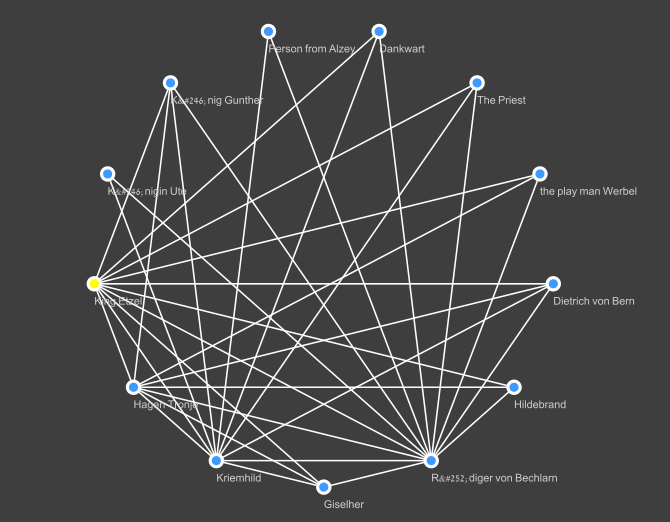

### Gephi Layout

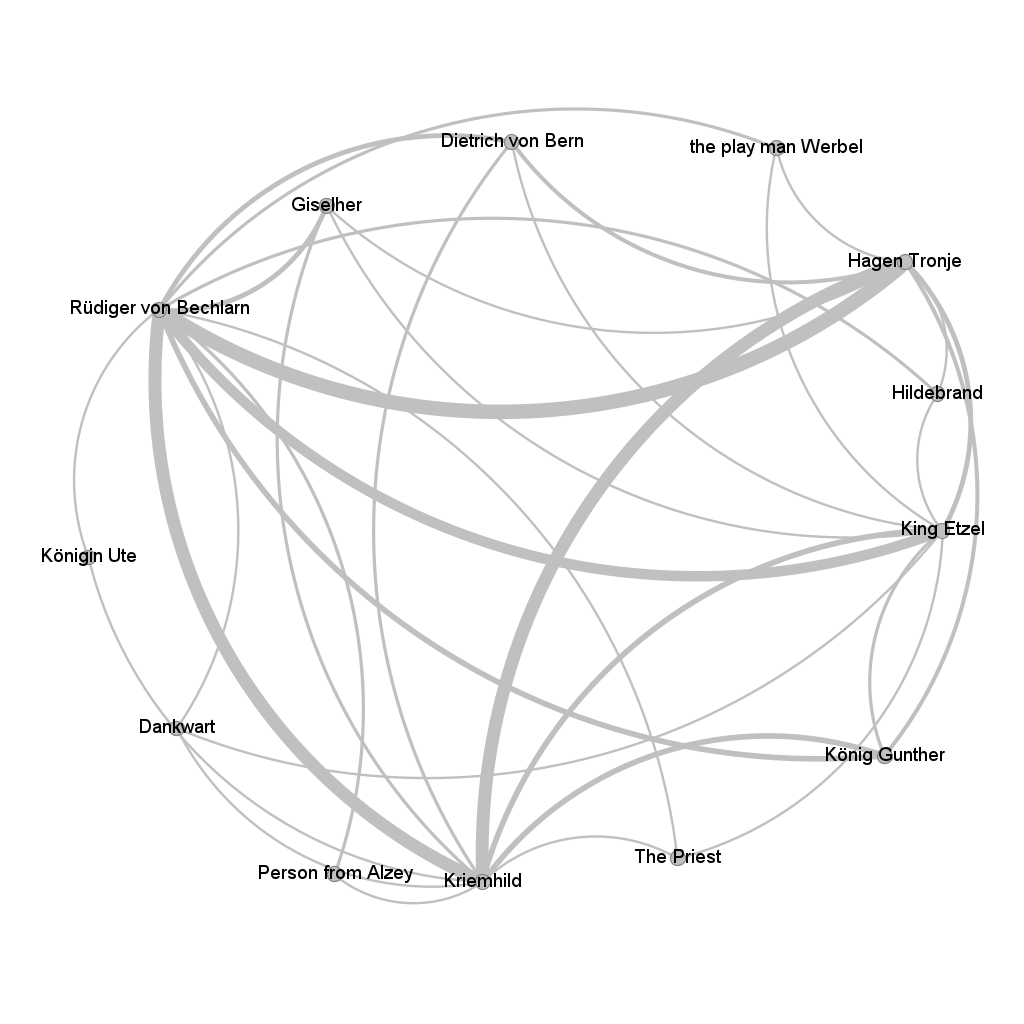

**Task 5:** Write a function that for a given vertex creates a subgraph of the selected vertex and all the vertex's in/out friends (10pt).
Draw the subgraph (5pt). Calculate the number of verticies and edges in the subgraph (5pt)

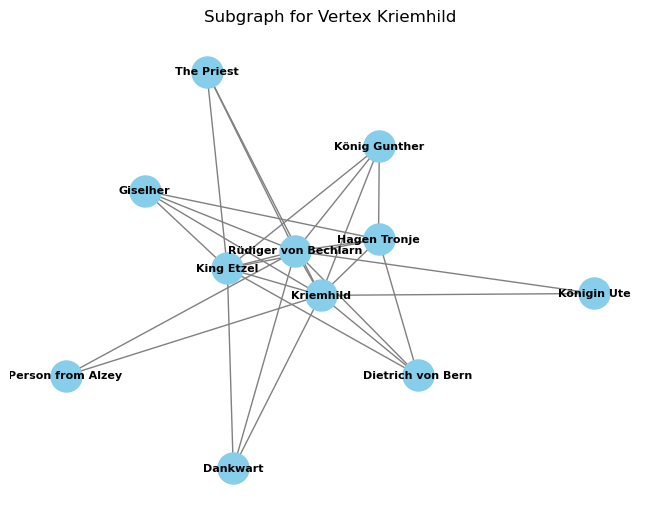

Number of vertices: 11
Number of edges: 28


In [5]:
def create_and_visualize_subgraph(graph, selected_vertex):
    # Create subgraph with selected vertex and its in/out neighbors
    subgraph_nodes = set([selected_vertex] + list(graph.neighbors(selected_vertex)))
    subgraph = graph.subgraph(subgraph_nodes)

    # Draw the subgraph
    pos = nx.spring_layout(subgraph)  # You can choose a different layout if needed
    nx.draw(subgraph, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=8, font_color='black', font_weight='bold', edge_color='gray')
    plt.title(f"Subgraph for Vertex {selected_vertex}")
    plt.show()

    # Calculate the number of vertices and edges in the subgraph
    num_vertices = len(subgraph.nodes)
    num_edges = len(subgraph.edges)

    return num_vertices, num_edges

# Choose a valid node from the graph (e.g., use the first node)
selected_vertex = list(movie_graph.nodes)[0]

# Call the function to create and visualize the subgraph
num_vertices, num_edges = create_and_visualize_subgraph(movie_graph, selected_vertex)

# Print the number of vertices and edges in the subgraph
print(f"Number of vertices: {num_vertices}")
print(f"Number of edges: {num_edges}")

**Task 6:** Find the top-10 most centeral players at [The Free Internet Chess Sever](http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz) (15 pt). Visualize part of the network (5pt).
    
**Note:** The network has 429,747,476 edges (Tip: use SGraph)

Top-10 Most Central Players:
Wronskian
fresh
pacip
Jeeper
Computer
Benkku
JagorCrafty
kemar
eurodive
SergeZ


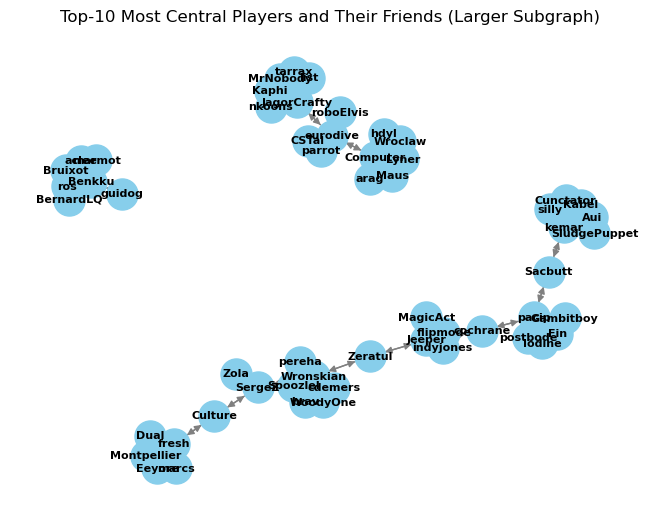

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Example: Read graph from CSV files
def read_graph_data(vertices_file, interactions_file):
    # Read vertices and interactions data from CSV files
    vertices_df = pd.read_csv(vertices_file, nrows=3000)
    interactions_df = pd.read_csv(interactions_file, nrows=3000)

    # Create a directed graph from the interactions DataFrame
    G = nx.DiGraph()

    # Add nodes from vertices
    G.add_nodes_from(vertices_df['v_id'])

    # Add edges from interactions
    for _, row in interactions_df.iterrows():
        datetime = row['datetime']
        source = row['src_id']
        target = row['dst_id']

        G.add_edge(source, target, datetime=datetime)

    return G

# Replace 'fcis_chess.vertices.csv' and 'fcis_chess.interactions.csv' with your actual file paths
fics_graph = read_graph_data('fcis_chess.vertices.csv', 'fcis_chess.interactions.csv')

# Calculate centrality measures
degree_centrality = nx.degree_centrality(fics_graph)
closeness_centrality = nx.closeness_centrality(fics_graph)
betweenness_centrality = nx.betweenness_centrality(fics_graph)

combined_centrality = {player: degree_centrality[player] + closeness_centrality[player] + betweenness_centrality[player]
                       for player in fics_graph.nodes()}

# Find the top-10 most central players
top_10_players = sorted(combined_centrality, key=combined_centrality.get, reverse=True)[:10]

# Print the top-10 most central players
print("Top-10 Most Central Players:")
for player in top_10_players:
    print(player)

# Add friends of the top-10 players
friends_of_top_10 = set(top_10_players)
for player in top_10_players:
    friends_of_top_10.update(fics_graph.neighbors(player))

# Visualize a larger part of the network (top-10 players and their friends)
larger_subgraph = fics_graph.subgraph(friends_of_top_10)
pos = nx.spring_layout(larger_subgraph)
nx.draw(larger_subgraph, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=8, font_color='black', font_weight='bold', edge_color='gray')
plt.title("Top-10 Most Central Players and Their Friends (Larger Subgraph)")
plt.show()

**Task 7:** Use Cytoscape to draw the Lord of the Rings Couples network (see Lecture 2).
Fill the network's vertices in a different color according to the gender.
Select each vertex shape to be according to the vertex race. (7pt)

In [7]:
import networkx as nx
import pandas as pd

# Assuming your CSV file is named 'lotr_characters.csv'
csv_file = 'lotr_characters.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file)
df = df[['name', 'gender', 'race', 'realm', 'spouse']]
df = df.fillna('')
df = df[df['spouse'] != 'Unnamed wife']
df = df[df['spouse'] != '']

# Create a directed graph using NetworkX
G = nx.DiGraph()

# Add nodes with attributes
for _, row in df.iterrows():
    # Ensure 'gender' is a string (convert NaN to an empty string)
    gender = str(row['gender']) if pd.notna(row['gender']) else ''
    G.add_node(row['name'], gender=gender, race=row['race'])

# Add edges (assuming there's a 'spouse' column representing relationships)
for _, row in df.iterrows():
    if pd.notna(row['spouse']):
        G.add_edge(row['name'], row['spouse'])

# Export the graph to a GML file
gml_file = 'lotr_characters_network.gml'
nx.write_gml(G, gml_file)

In [8]:
set(df['gender'])

{'', 'Female', 'Male', 'Most likely male', 'male'}

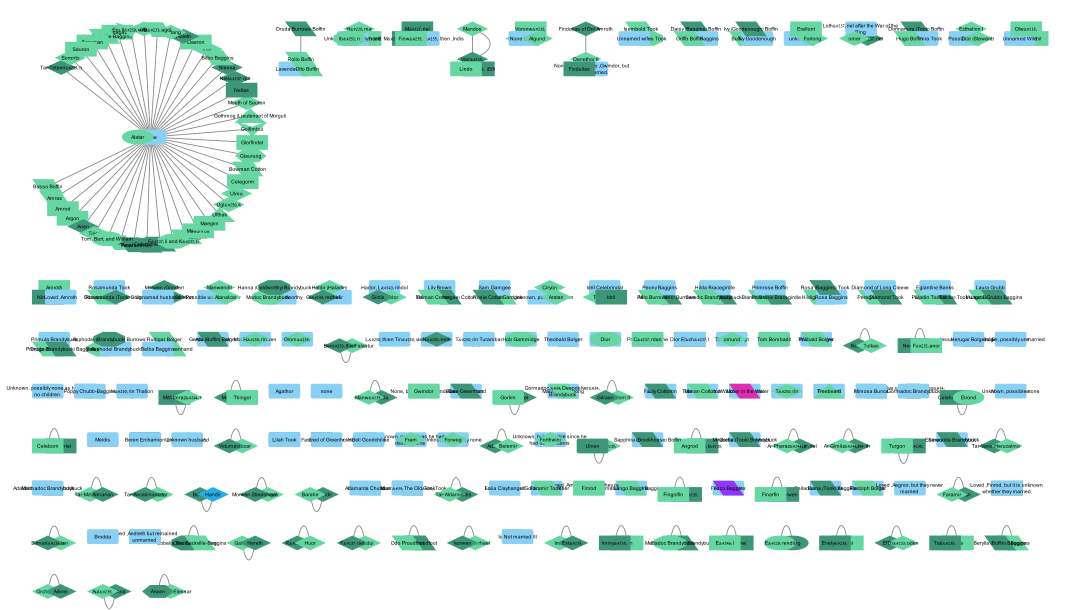

### Additional Questions for Practice

**Task 1:** Visualize the distribution of the network's strongly and weakly connected components.

**Task 2:** Using Cytoscape, visualize the network's maximal strongly connected component (or part of it)

**Task 3:** Draw a subgraph of all the vertices that have at least one reciprocal link, i.e., all the vertices where there is at least one vertex _u_ so that both links (u,v) and (v,u) exists

**Task 4:** Split the network into communities, and find the second most central vertex in each community
    

**Task 5:** Find the top-10 most central players at [The Free Internet Chess Server](http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz).
    Visualize part of the network.
    
**Note:** The network has 429,747,476 edges